In [90]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [91]:
dem_candidates = pd.read_csv('../datasets/dem_candidates.csv')

In [92]:
endorsement_cols = dem_candidates.columns[pd.Series(dem_candidates.columns).str.contains('Endorsed|Party Support')]
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].fillna(0)
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].replace({'No': 0, 'Yes': 1})
dem_candidates['General Status'] = dem_candidates['General Status'].replace({'None': 0, 'On the Ballot': 1})

In [94]:
govs = dem_candidates[(dem_candidates['Office Type'] == 'Governor')]

In [95]:
house = dem_candidates[dem_candidates['Office Type'] == 'Representative']

In [109]:
# Assuming you have a list of endorsement column names
endorsement_columns = endorsement_cols

def endorsement_effect(data):
    # Calculating the 'Partisan Lean' percentiles and bins
    percentiles = data['Partisan Lean'].quantile([0.25, 0.5, 0.75]).tolist()
    data['Partisan Lean Percentile Bins'] = pd.cut(data['Partisan Lean'], bins=[-np.inf] + percentiles + [np.inf], labels=['0-25%', '26-50%', '51-75%', '76-100%'])

    # Looping through each endorsement column
    for endorsement in endorsement_columns:
        plt.figure(figsize=(12, 8))
        for i, bin in enumerate(data['Partisan Lean Percentile Bins'].cat.categories, start=1):
            bin_data = data[data['Partisan Lean Percentile Bins'] == bin]

            # Calculating success rate for each endorsement status within the bin
            success_rate_endorsed = bin_data[bin_data[endorsement] == 1]['General Status'].mean()
            success_rate_not_endorsed = bin_data[bin_data[endorsement] == 0]['General Status'].mean()

            plt.subplot(2, 2, i)
            sns.barplot(x=[f'{endorsement[:-1]}', f'Not {endorsement[:-1]}'], y=[success_rate_endorsed, success_rate_not_endorsed])
            plt.title(f'Success Rate in Partisan Lean Percentile Bin: {bin}')
            plt.ylabel('Success Rate')

        plt.suptitle(f'Success Rate Analysis for {endorsement}')
        plt.tight_layout()
        plt.show()

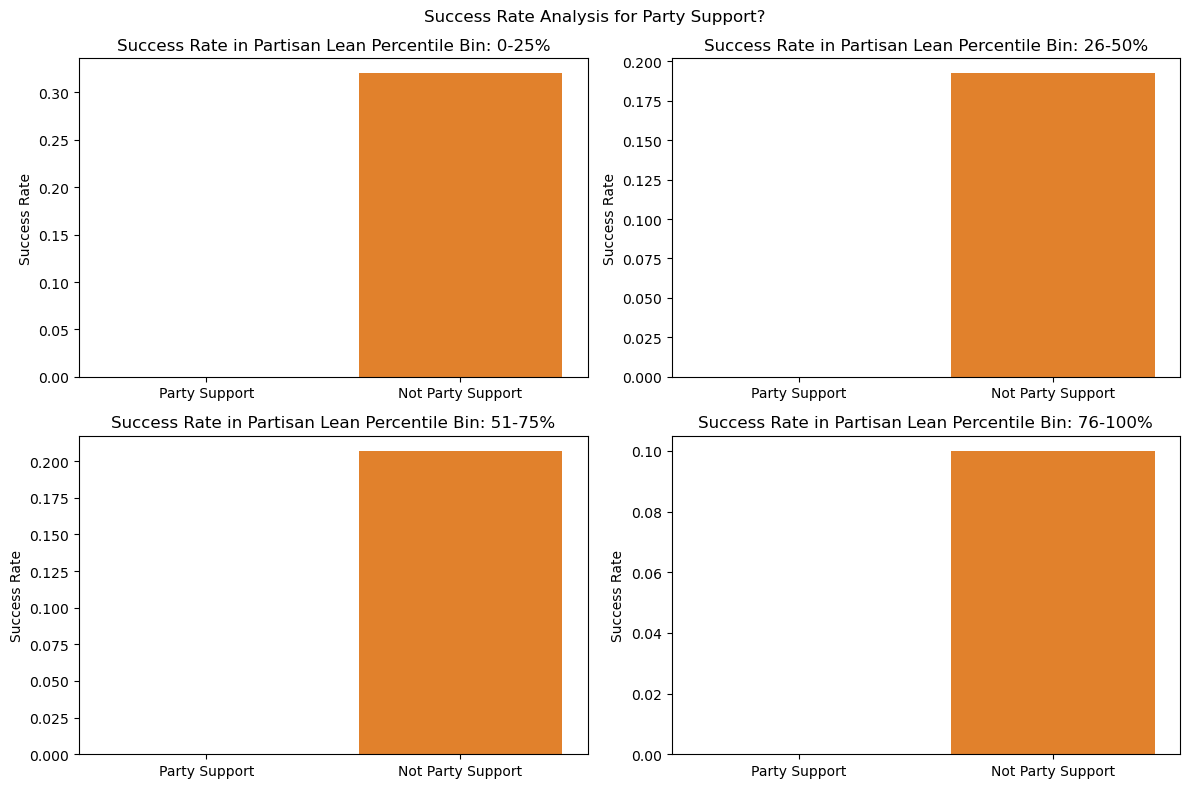

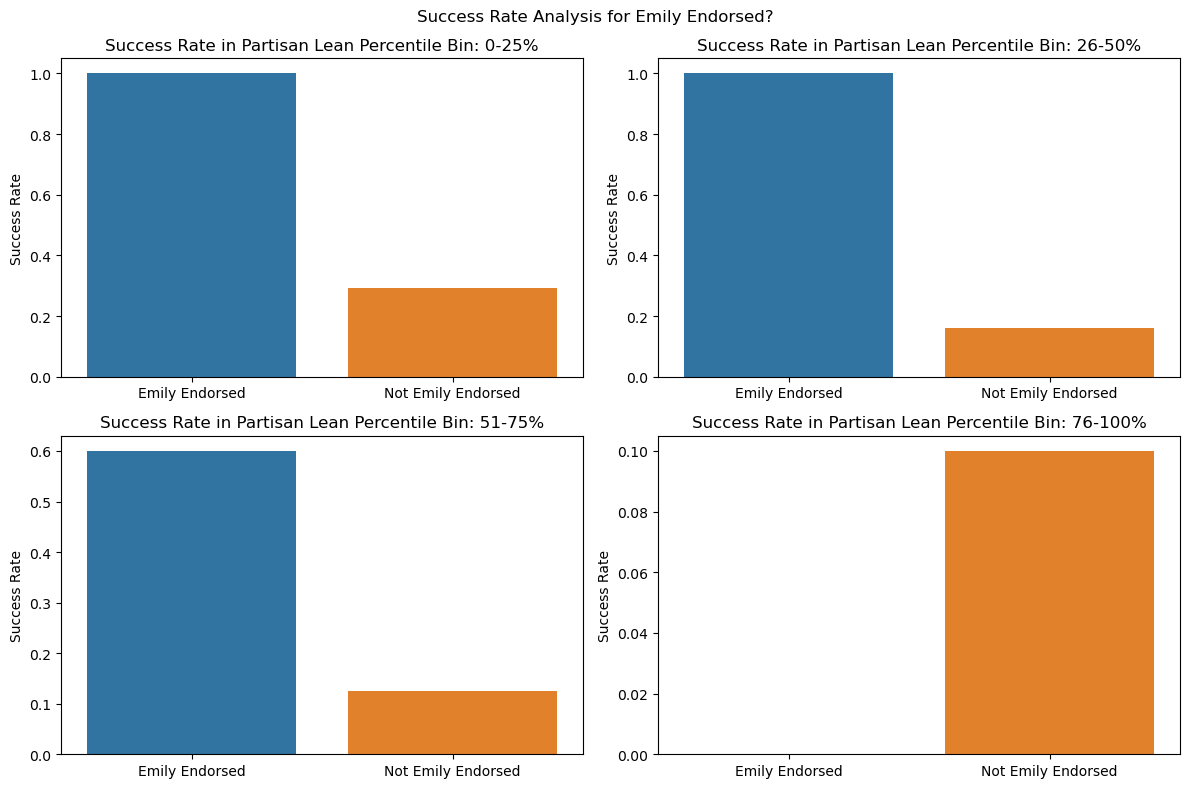

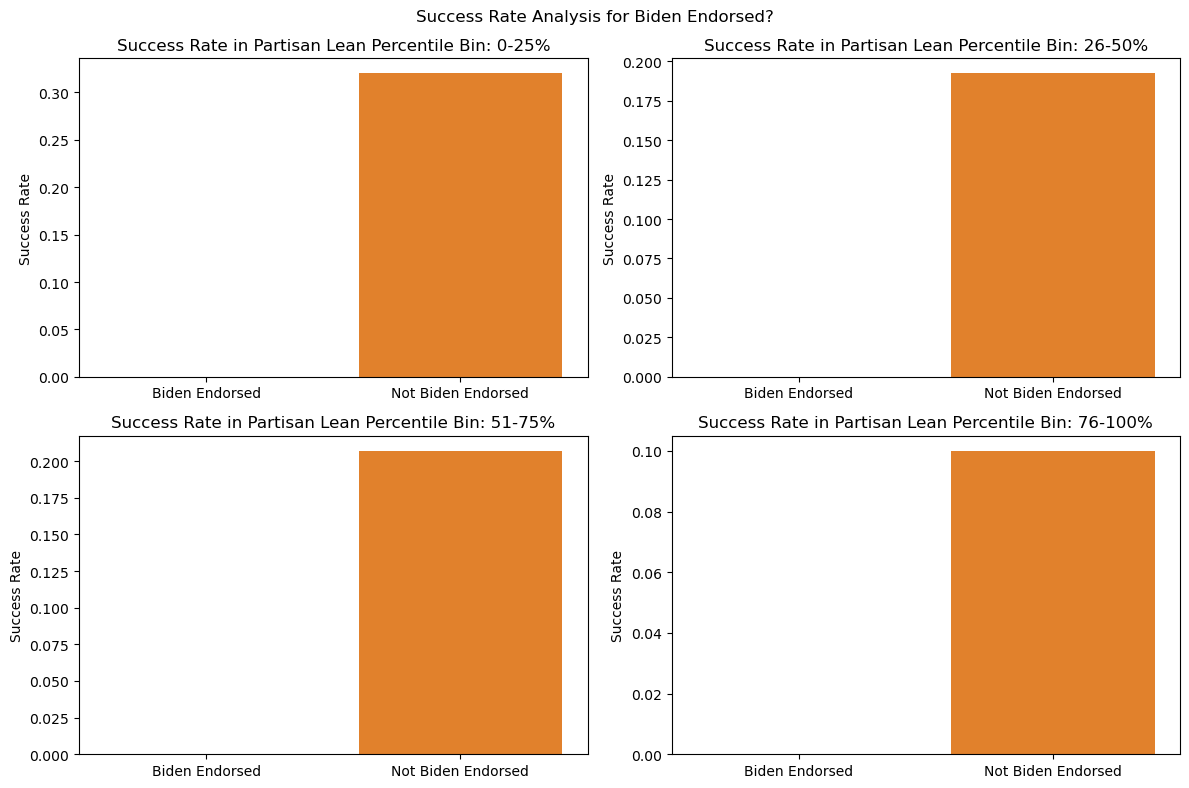

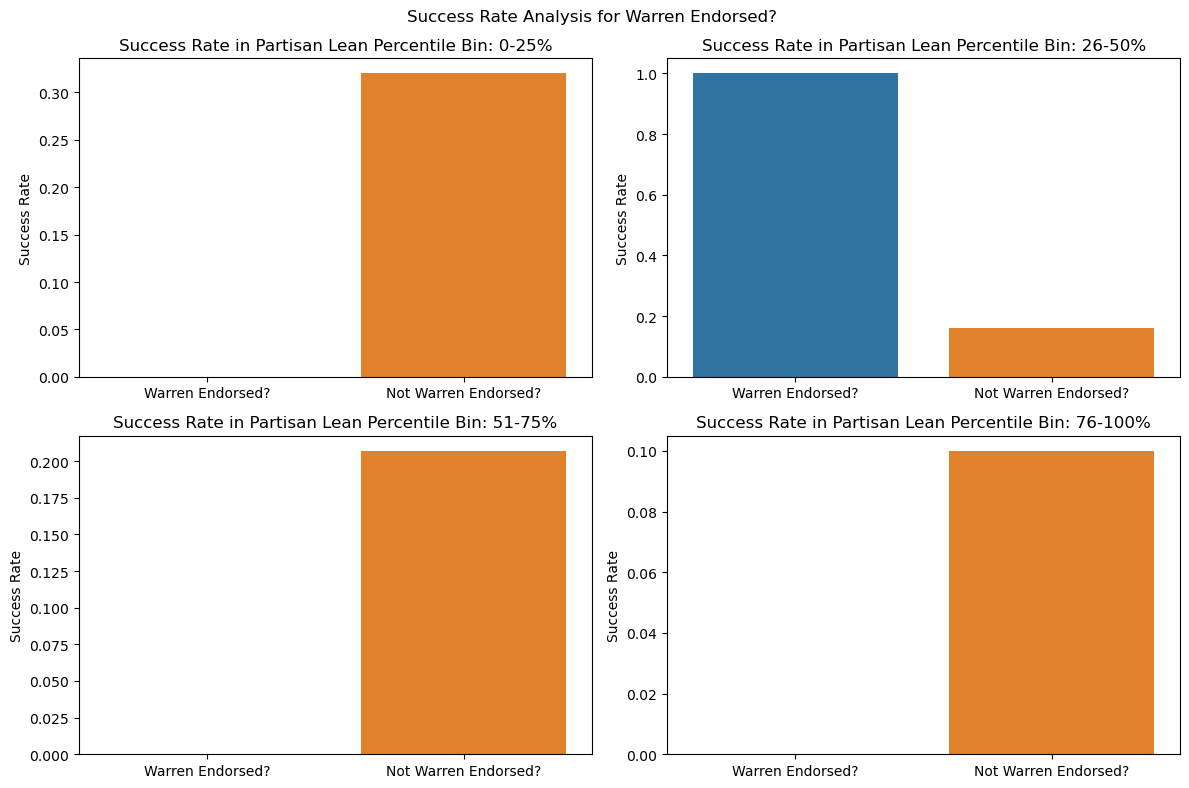

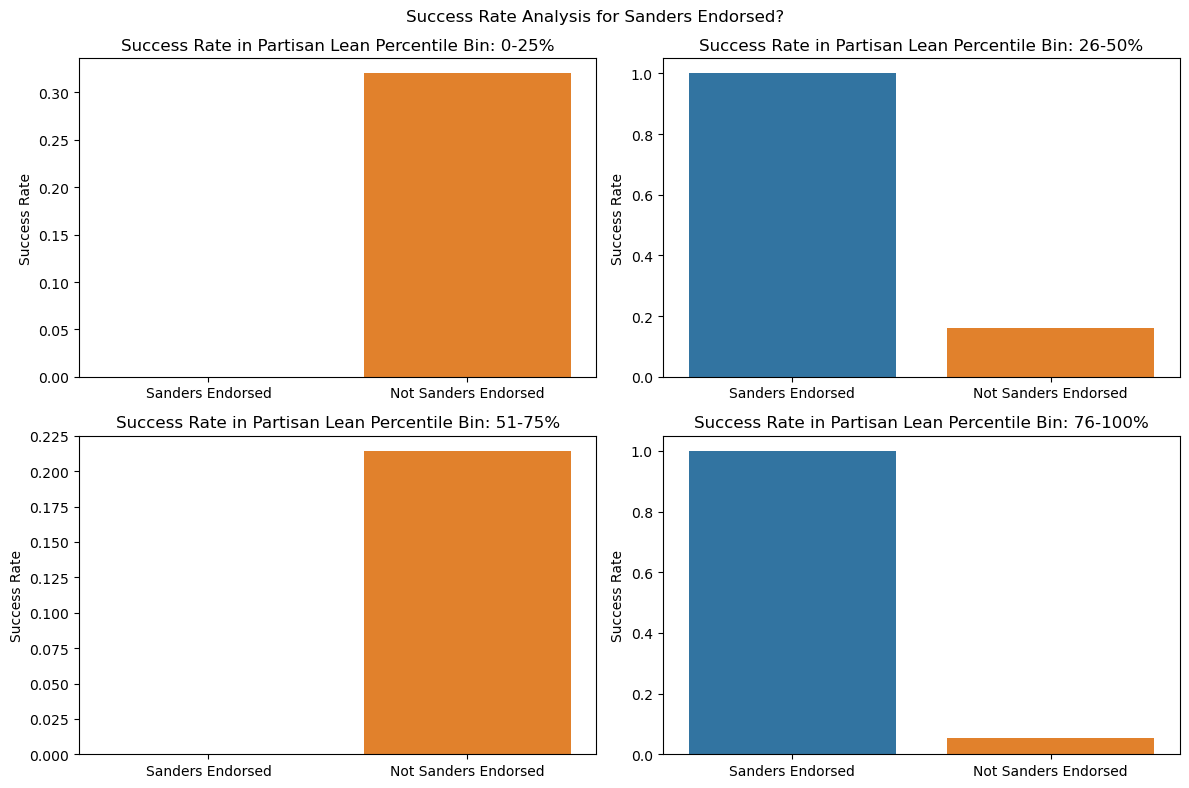

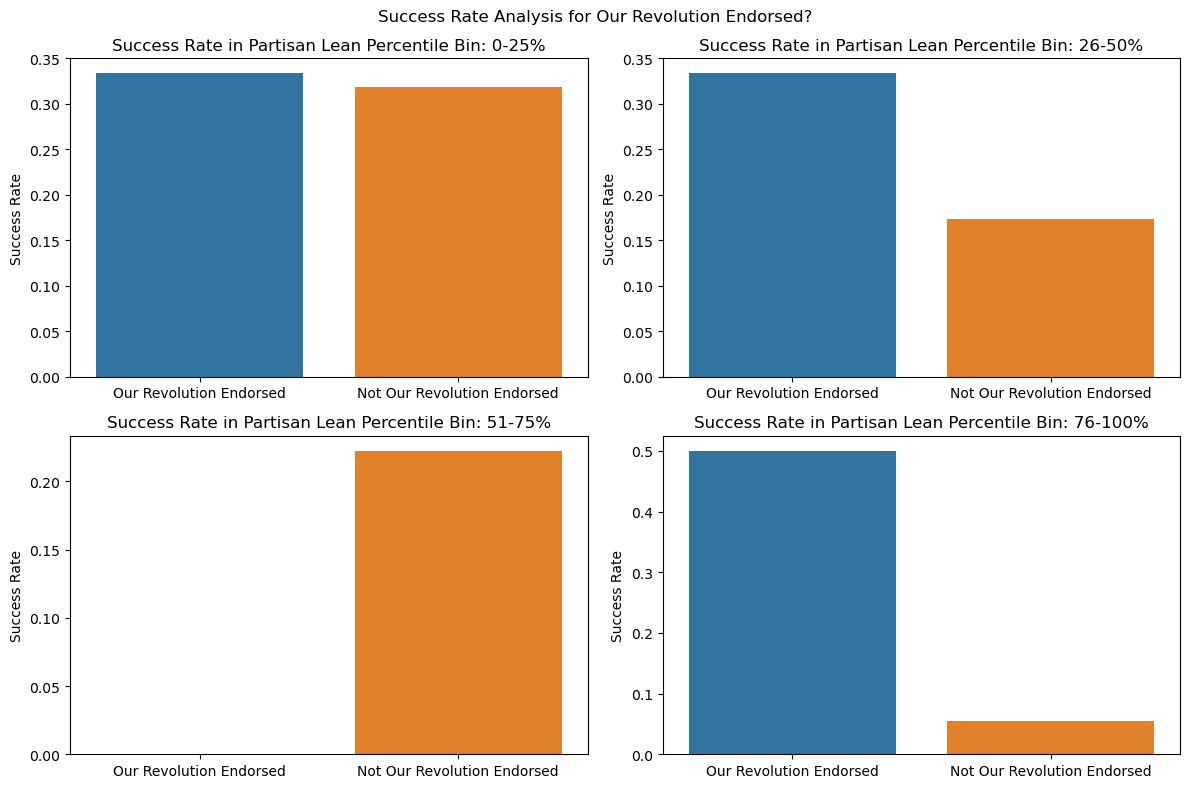

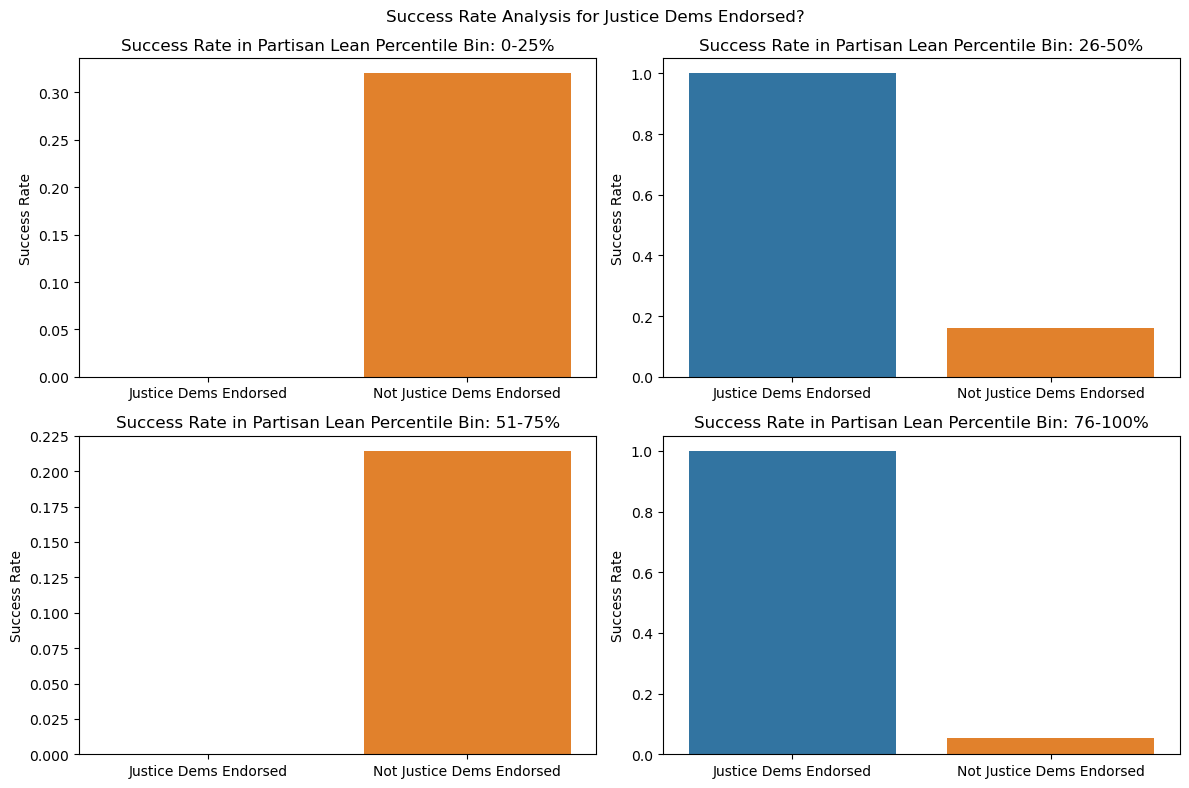

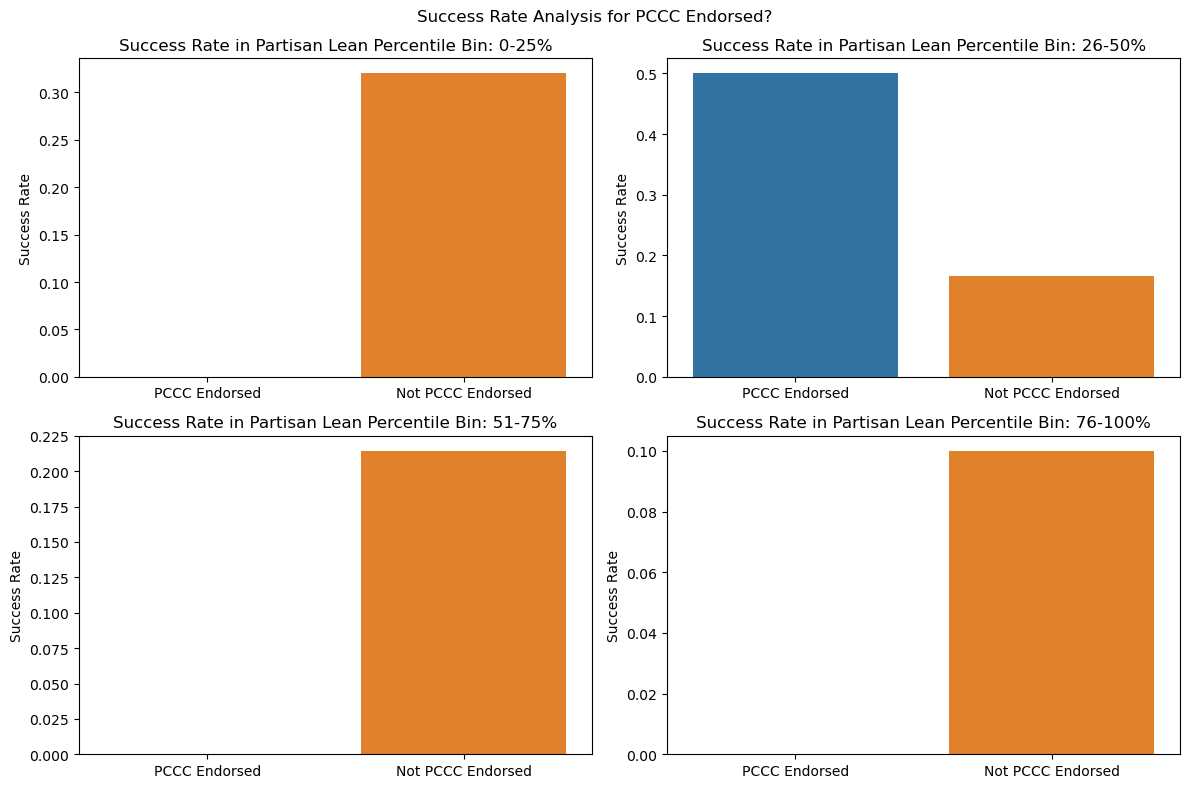

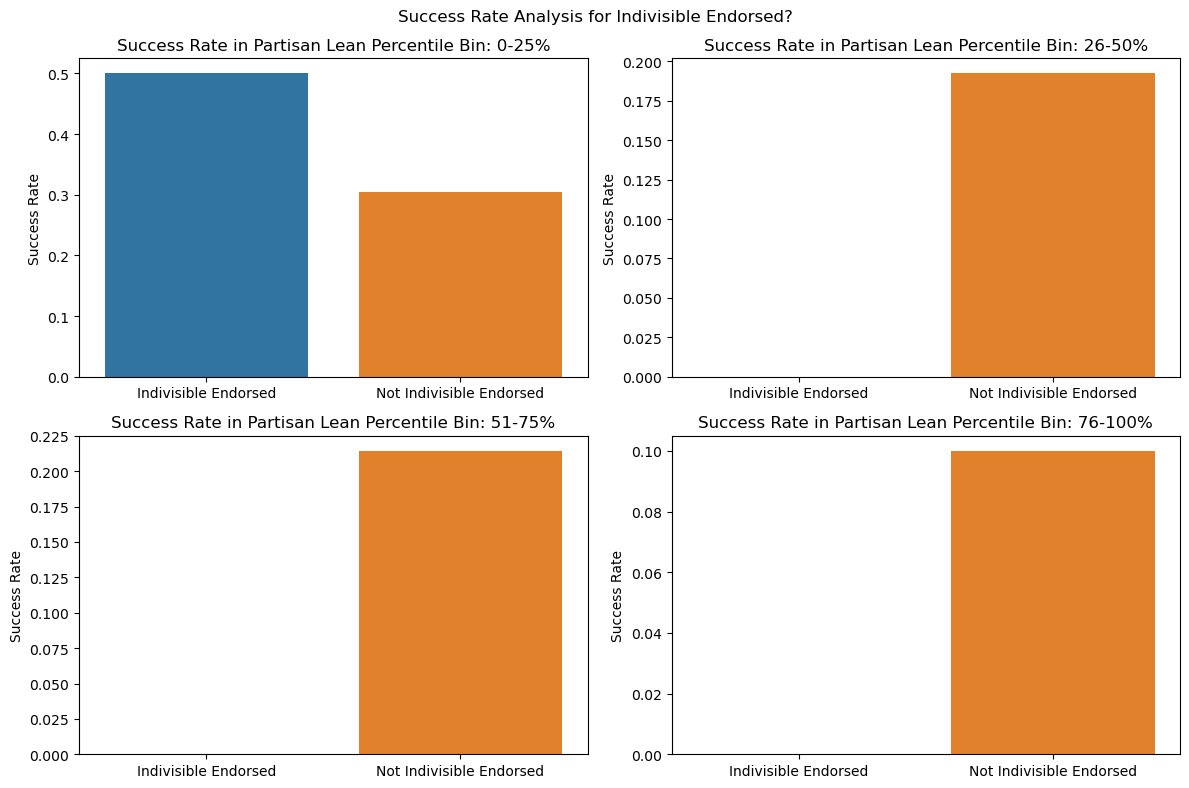

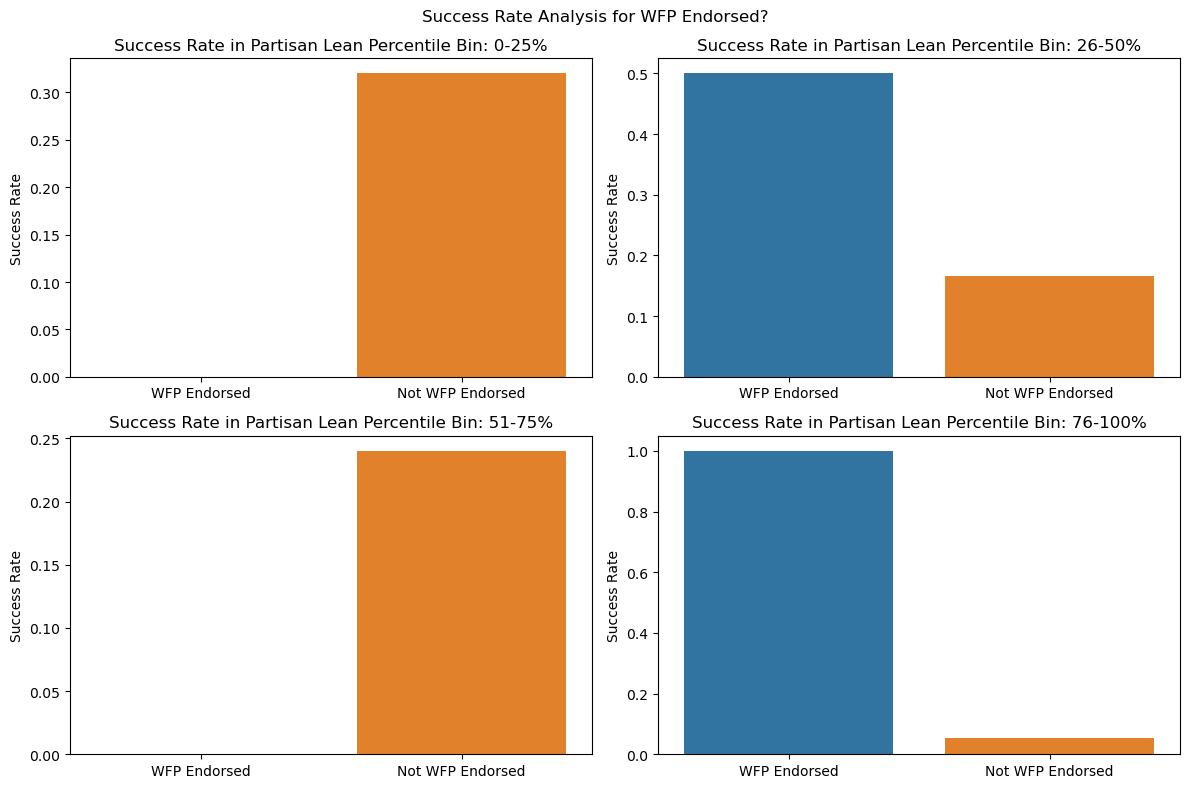

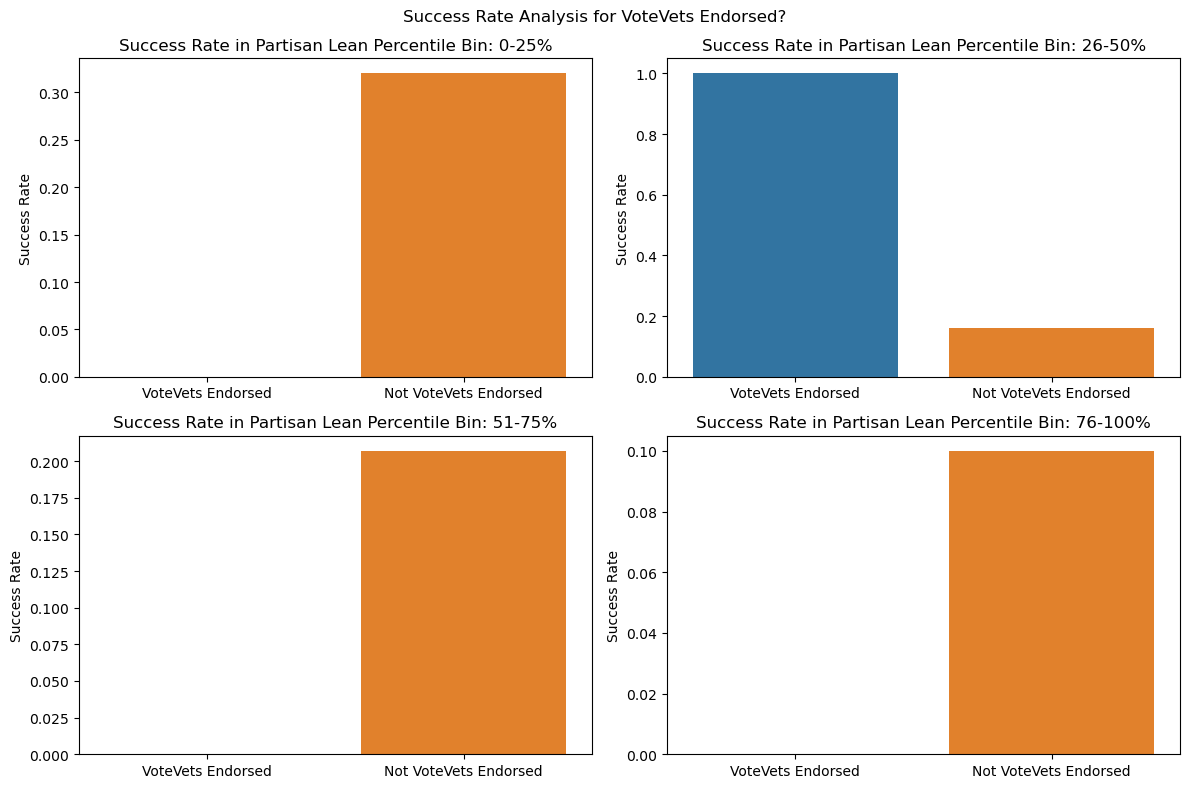

In [110]:
endorsement_effect(house)